# Image Recognition using CNN on CIFAR-10 Dataset

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

Load the dataset

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Normalize the data

In [3]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

Convert the class vectors to binary class matrices

In [4]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Compile the model

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18464     
                                                      

In [8]:
model.fit(
    X_train,
    y_train,
    batch_size =32,
    epochs=12,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/12
1563/1563 [==============================] - 222s 141ms/step - loss: 1.5529 - accuracy: 0.4295 - val_loss: 1.1562 - val_accuracy: 0.5764
Epoch 2/12
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1764 - accuracy: 0.5837 - val_loss: 0.9933 - val_accuracy: 0.6450
Epoch 3/12
1563/1563 [==============================] - 220s 141ms/step - loss: 1.0465 - accuracy: 0.6288 - val_loss: 0.8883 - val_accuracy: 0.6894
Epoch 4/12
1563/1563 [==============================] - 219s 140ms/step - loss: 0.9490 - accuracy: 0.6647 - val_loss: 0.9580 - val_accuracy: 0.6661
Epoch 5/12
1563/1563 [==============================] - 218s 140ms/step - loss: 0.8840 - accuracy: 0.6883 - val_loss: 0.7908 - val_accuracy: 0.7301
Epoch 6/12
1563/1563 [==============================] - 219s 140ms/step - loss: 0.8415 - accuracy: 0.7052 - val_loss: 0.7972 - val_accuracy: 0.7216
Epoch 7/12
1563/1563 [==============================] - 218s 139ms/step - loss: 0.7964 - accuracy: 0.7199 - val_

Save the neural network architecture

In [9]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4398

Save the trained neural network weights

In [10]:
model.save_weights("model_weight.h5")

Making predictions on the images

In [11]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [12]:
class_labels=[
    "Planes",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the json file that contains the model structure

In [14]:
f=Path("model_structure.json")
model_structure=f.read_text()

Recreate the keras model object from the json data

In [15]:
model=model_from_json(model_structure)

Reload the model training weights

In [16]:
model.load_weights("model_weight.h5")

Load an image file to test

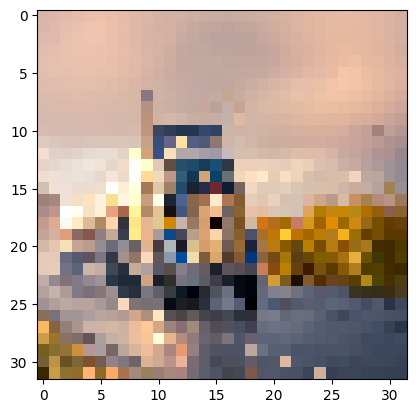

In [36]:
import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img, img_to_array

img=load_img("truck1.png",target_size=(32,32))

plt.imshow(img)

# New Section

# New Section

Convert the image to a numpy array

In [37]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

In [38]:
list_of_images=np.expand_dims(image_to_test,axis=0)

Make predictions using the model

In [39]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 22ms/step


Since we are only testing one image, we only need to check the first result

In [40]:
single_result=results[0]

We will get a likelihood score for all 10 possible classes. Find out which class has the highest score.

In [41]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

Get the name of the most likely class

In [42]:
class_label=class_labels[most_likely_class_index]

Print the result

In [43]:
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a Truck likelihood: 1.000000
